### Importation des bibliothèques pour explorer les données:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### Lecture du dataset dans la variable data

In [4]:
data = pd.read_csv("data/original.csv")

### Affichage du dataset

In [5]:
data

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


### Quelques informations sur le dataset


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


Nous observons que toutes les colonnes ne comportent pas de données manquantes sauf la colonne "age" qui contient 3 valeurs nullles. Nous allons ces lignes qui contiennent ces valeurs nulles étant donné qu'elles ne représentent que 0,0015% de notre dataset, ainsi elles n'auront pas d'impact sur notre modèle.

La variable qui nous intéresse (en d'autres termes notre "target") est la variable default qui montre si l'individu est un bon client (default=0) ou pas (default=1).

### Limitons-nous maintenant aux variables explicatives seulement

In [7]:
exp_vars = data[['income','age','loan']]

In [8]:
exp_vars

,income,age,loan
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235
...,...,...,...
1995,59221.044874,48.518179,1926.729397
1996,69516.127573,23.162104,3503.176156
1997,44311.449262,28.017167,5522.786693
1998,43756.056605,63.971796,1622.722598


### Détails sur le dataset contenant les variables explicatives

In [9]:
exp_vars.describe()

,income,age,loan
count,2000.000000,1997.000000,2000.000000
mean,45331.600018,40.807559,4444.369695
std,14326.327119,13.624469,3045.410024
min,20014.489470,-52.423280,1.377630
25%,32796.459717,28.990415,1939.708847
50%,45789.117313,41.317159,3974.719419
75%,57791.281668,52.587040,6432.410625
max,69995.685578,63.971796,13766.051239


On remarque que le minimum des âges est -53, ce qui n'est pas logique.  
Cherchons maintenant, toutes les lignes contenant un âge négatif.

In [10]:
exp_vars[exp_vars['age'] <0 ]

,income,age,loan
15,50501.726689,-28.218361,3977.287432
21,32197.620701,-52.423280,4244.057136
26,63287.038908,-36.496976,9595.286289


Nous remarquons que 3 lignes seulement comportent des âges négatifs. Au total, nous avons trouvé 6 lignes qui sont "erronées" parmi 2000, ce qui est très faible et ainsi notre modèle sera intact.

# Visualisation de la data

### Visualisons notre target d'abord

In [11]:
#Selection de la colonne default(target)

In [12]:
default = data.default

<AxesSubplot:title={'center':'Distribution des clients'}, xlabel='Good Client                             Bad Client', ylabel='Fréquence'>

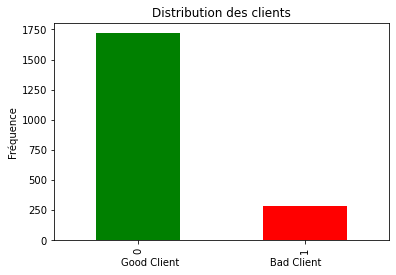

In [13]:
default.value_counts().plot(kind = 'bar', color = ['g','r'], title = "Distribution des clients", xlabel = "Good Client                             Bad Client", ylabel = "Fréquence")

In [19]:
#Pourcentage des bons et mauvais clients
default.value_counts()*100/2000

0    85.85
1    14.15
Name: default, dtype: float64

Nous remarquons que la distribution est déséquilibrée 

<AxesSubplot:xlabel='default', ylabel='income'>

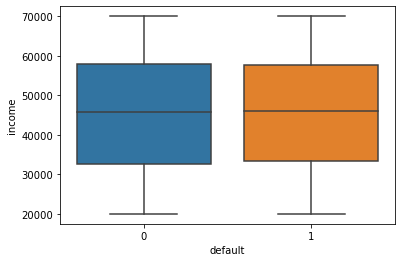

In [15]:
sb.boxplot(data=data, x = "default", y="income")

Nous observons que les deux boîtes à moustaches sont quasi-similaires dans les deux cas (default=0 et default=1) ce qui nous laisse déduire que la variable 'income' n'est pas forcément la variable la plus significative.

<AxesSubplot:xlabel='default', ylabel='age'>

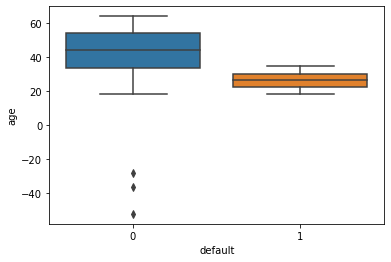

In [16]:
sb.boxplot(data=data, x = "default", y="age")

Contrairement au graphe précédent, nous remarquons qu'il y'a une différence assez visible entre les deux boîtes à moustaches ce qui fait que la variable 'age' est une variable plus significative que la précédente. 

<AxesSubplot:xlabel='default', ylabel='loan'>

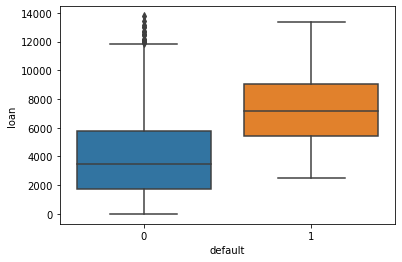

In [17]:
sb.boxplot(data=data, x = "default", y="loan")

Pour ce graphe, nous pouvons faire la même remarque que le précédent. Ce qui nous laisse déduire que les variables 'age' et 'loan' sont les variables les plus significatives dans ce modèle.